# LD3 - Audio filter design

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

from IPython.core.display import HTML
HTML(r"""
<style>
    .jp-MarkdownCell .jp-RenderedHTMLCommon {
        font-family: "Times New Roman", Times, serif;
        font-size: 20px
    }
</style>
""")

# Minimum Phase 

Convert a linear-phase FIR filter to minimum phase using the Hilbert transform and/or cepstral windowing method and create plots to compare

## The Hilbert Transform Method

$H(e^{j\omega})\triangleq G(\omega) e^{j\theta(\omega)}$

$G(\omega) \triangleq |H(e^{j\omega})|$

$lnH(e^{j\omega}) = lnG(\omega) + j\theta(\omega)$ 

In [11]:
fs = 44100
NFFT = 2048     # Must be long enough!!!

In [12]:
# generate a linear-phase FIR filter
fc = 3000
filter_order = 20
fir_coef = signal.firwin(filter_order, fc, fs=fs)  # impulse response

w, h_FIR = signal.freqz(fir_coef, 1, NFFT, fs=fs)   # frequency response of FIR

# convert Linear Phase Filter to Minimum Phase:

# Compute frequency response of the filter
H = np.fft.fft(fir_coef, NFFT)

# Compute minimum-phase function using Hilbert transform
P = np.imag(-signal.hilbert(np.log(np.abs(H) + 1e-10)))

# Replace phase response with minimum-phase function
Hm = np.abs(H) * np.exp(1j * P)

# Obtain minimum-phase impulse response
hm_hil = np.fft.irfft(Hm, NFFT)   # IFFT (real part)

w, h_minP_hil = signal.freqz(hm_hil, 1, NFFT, fs=fs) # minPhase frequency response

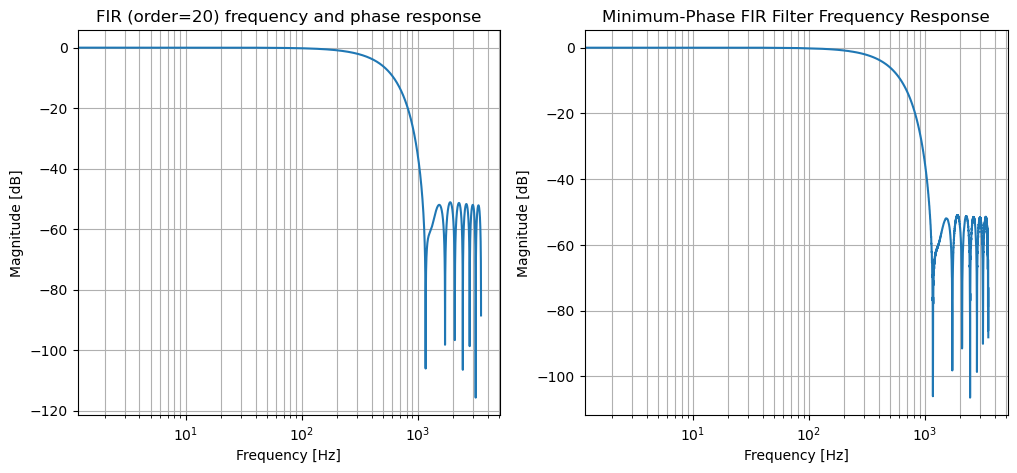

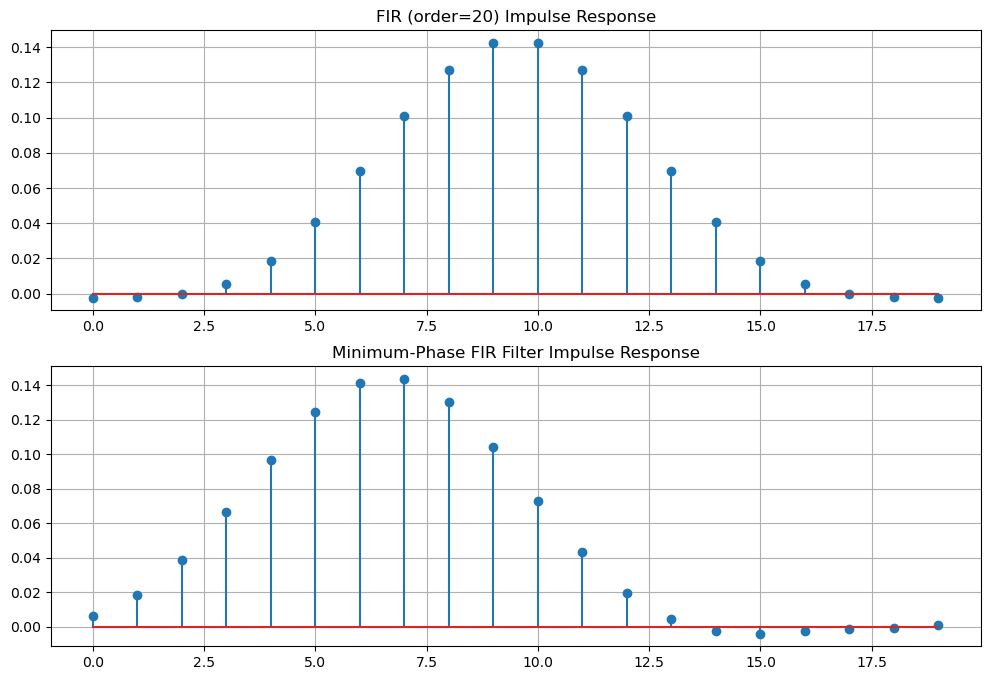

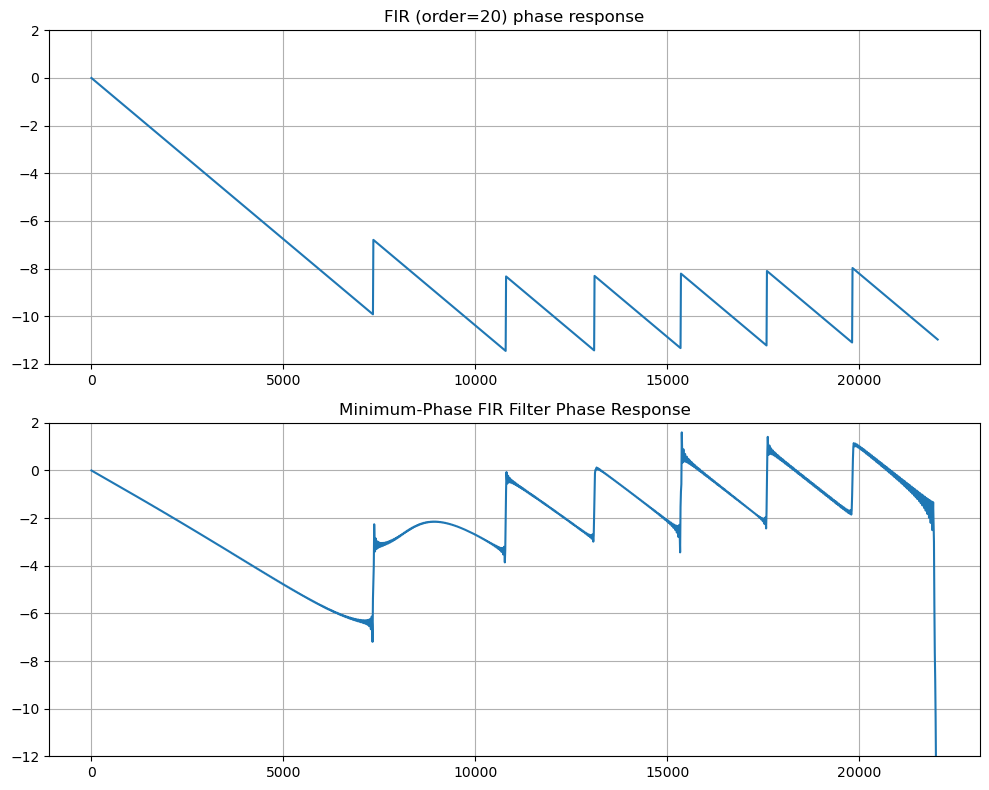

In [13]:
# Plot frequency response of original and minimum-phase filters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.semilogx(w / (2*np.pi), 20 * np.log10(abs(h_FIR)))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('FIR (order=20) frequency and phase response')
plt.grid(which='both', axis='both')

plt.subplot(1, 2, 2)
plt.semilogx(w / (2*np.pi), 20 * np.log10(abs(h_minP_hil)))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')
plt.title('Minimum-Phase FIR Filter Frequency Response')

# Plot impulse responses of original and minimum-phase filters
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.stem(fir_coef)
plt.title('FIR (order=20) Impulse Response')
plt.grid(which='both', axis='both')

plt.subplot(2, 1, 2)
plt.stem(hm_hil[:20])
plt.grid(which='both', axis='both')
plt.title('Minimum-Phase FIR Filter Impulse Response')

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(w , np.unwrap(np.angle(h_FIR)))
plt.ylim((-12, 2))
plt.title('FIR (order=20) phase response')
plt.grid(which='both', axis='both')

plt.subplot(2, 1, 2)
plt.plot(w , np.unwrap(np.angle(h_minP_hil)))
plt.ylim((-12, 2))
plt.title('Minimum-Phase FIR Filter Phase Response')
plt.grid(which='both', axis='both')


plt.tight_layout()
plt.show()

## Cepstral Windowing

$c(n) = F^{-1}{log|H(z)|}$

$\hat{c}(n) = c(n) w(n)$

$h_{mp}(n) = F^{-1}{e^{F{\hat{c}(n)}}}$

In [14]:
# Compute frequency response of the filter
H = np.fft.fft(fir_coef, NFFT)

# Compute cepstral-domain windowing
ceps = np.real(np.fft.ifft(np.log(np.abs(H) + 1e-10)))
odd = NFFT % 2
wn = np.concatenate((np.ones(1), 2 * np.ones((NFFT + odd) // 2 - 1), np.ones(1 - odd), np.zeros((NFFT + odd) // 2 - 1)))
Bhat = np.zeros(NFFT)
hm_ceps = np.fft.irfft(np.exp(np.fft.fft(wn * ceps, NFFT)), NFFT)

w, h_minP_cep = signal.freqz(hm_ceps, 1, NFFT, fs=fs) # minPhase frequency response

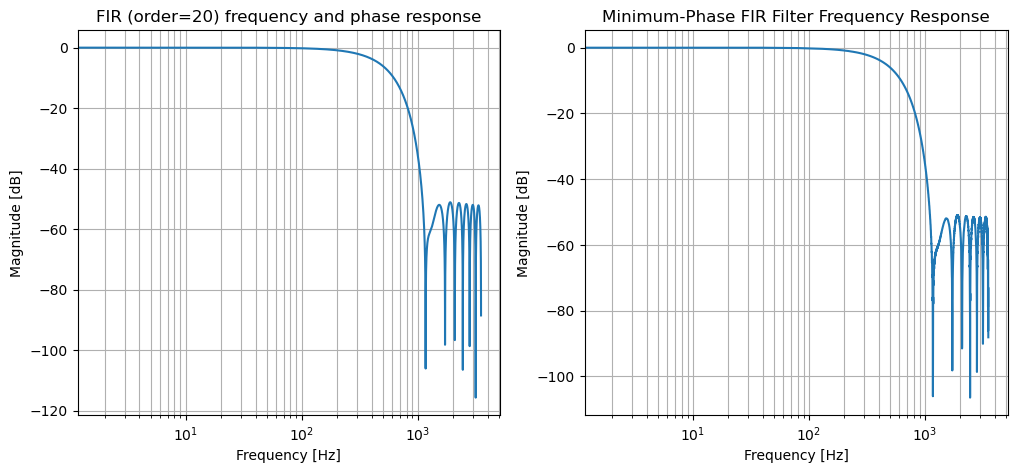

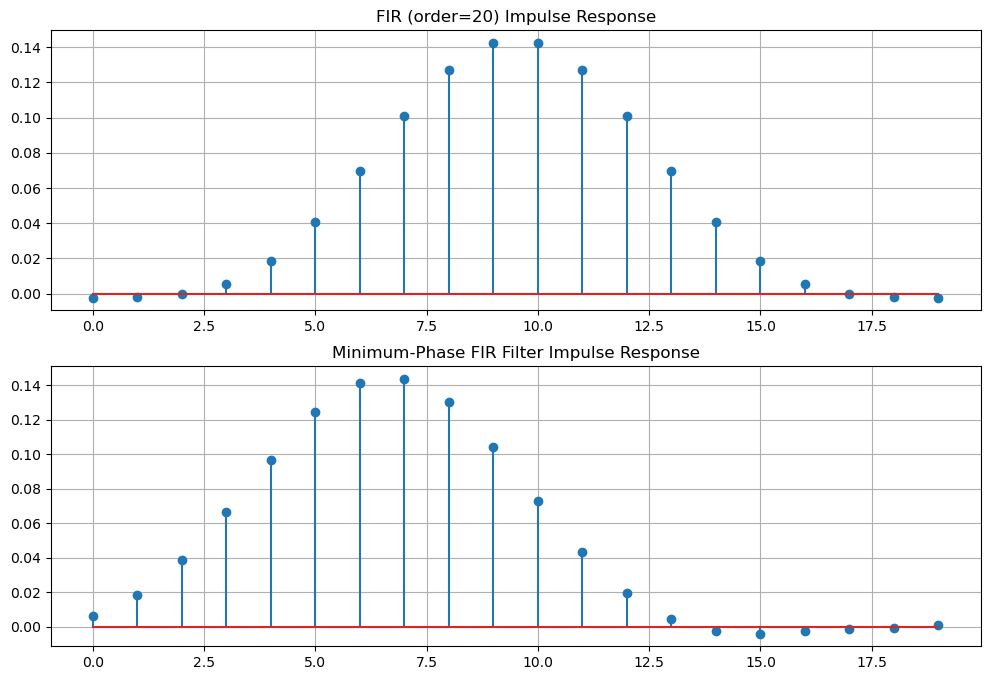

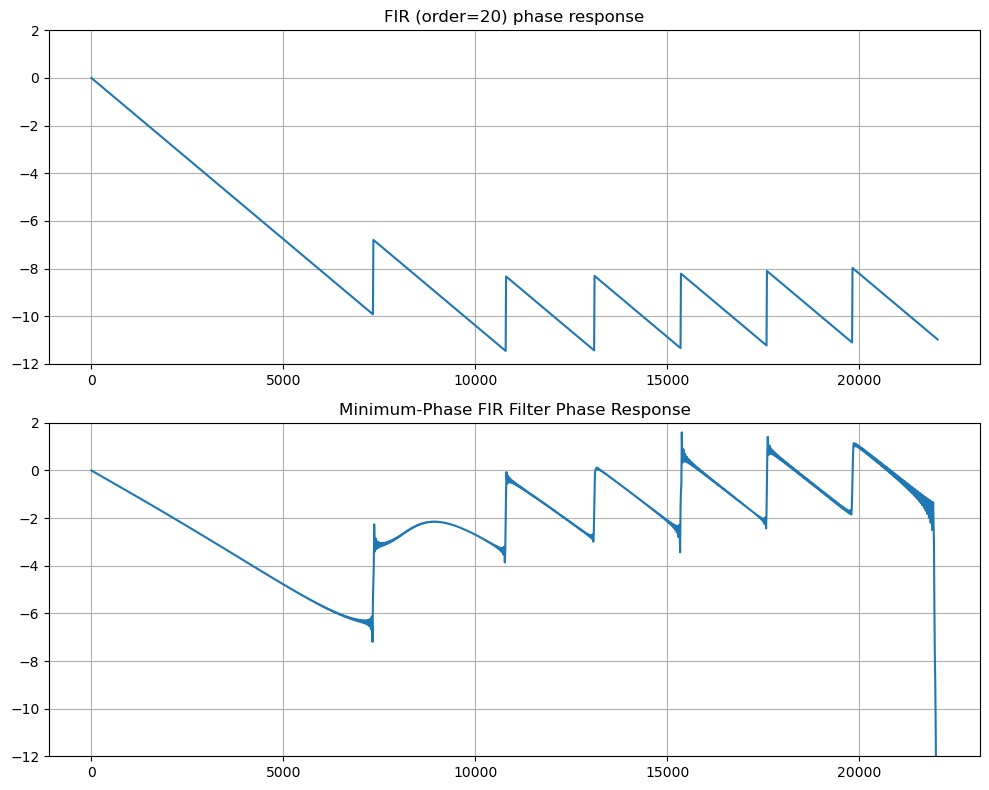

In [15]:
# Plot frequency response of original and minimum-phase filters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.semilogx(w / (2*np.pi), 20 * np.log10(abs(h_FIR)))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('FIR (order=20) frequency and phase response')
plt.grid(which='both', axis='both')

plt.subplot(1, 2, 2)
plt.semilogx(w / (2*np.pi), 20 * np.log10(abs(h_minP_cep)))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')
plt.title('Minimum-Phase FIR Filter Frequency Response')

# Plot impulse responses of original and minimum-phase filters
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.stem(fir_coef)
plt.title('FIR (order=20) Impulse Response')
plt.grid(which='both', axis='both')

plt.subplot(2, 1, 2)
plt.stem(hm_ceps[:20])
plt.grid(which='both', axis='both')
plt.title('Minimum-Phase FIR Filter Impulse Response')

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(w , np.unwrap(np.angle(h_FIR)))
plt.ylim((-12, 2))
plt.title('FIR (order=20) phase response')
plt.grid(which='both', axis='both')

plt.subplot(2, 1, 2)
plt.plot(w , np.unwrap(np.angle(h_minP_cep)))
plt.ylim((-12, 2))
plt.title('Minimum-Phase FIR Filter Phase Response')
plt.grid(which='both', axis='both')


plt.tight_layout()
plt.show()

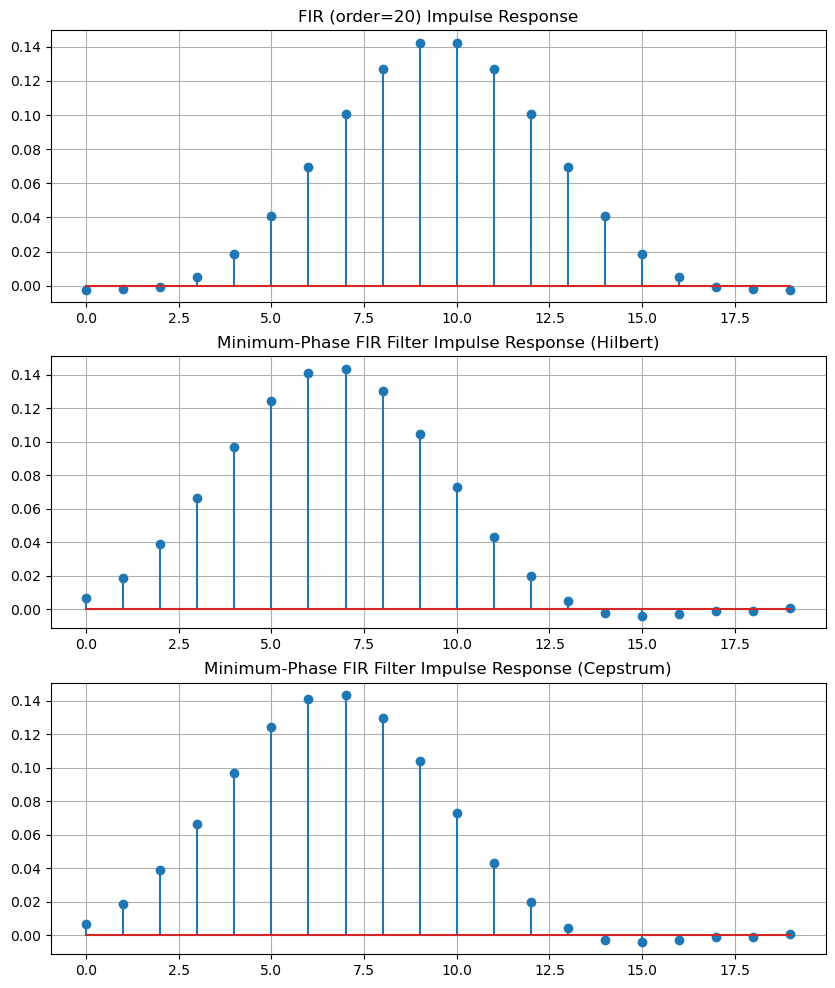

In [16]:
plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
plt.stem(fir_coef)
plt.title('FIR (order=20) Impulse Response')
plt.grid(which='both', axis='both')

plt.subplot(3, 1, 2)
plt.stem(hm_hil[:20])
plt.grid(which='both', axis='both')
plt.title('Minimum-Phase FIR Filter Impulse Response (Hilbert)')

plt.subplot(3, 1, 3)
plt.stem(hm_ceps[:20])
plt.grid(which='both', axis='both')
plt.title('Minimum-Phase FIR Filter Impulse Response (Cepstrum)')

plt.show()

# Reference

[1] https://ccrma.stanford.edu/~jos/mdft/Analytic_Signals_Hilbert_Transform.html

[2] https://ccrma.stanford.edu/~jos/sasp/Minimum_Phase_Filter_Design.html

[3] https://codepad.co/snippet/making-a-minimum-phase-fir-filter-in-python

[4] https://github.com/shun60s/Python-minimum-phase-FIR-design/blob/master/README.md

[5] https://www.dsprelated.com/freebooks/filters/Minimum_Phase_Filters.html